# Lab 6 - Mathematical Distributions

In [1]:
% matplotlib inline

UsageError: Line magic function `%` not found.


This will make all the `matplotlib` images appear in the notebook.

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN685.648@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. It should say `In [1]` for the first codecell and increase by 1 throughout.

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

## Generating Samples from Probability Distributions

Doctors work on cadavers and other professionals learn on similar, if less gruesome, models. For data scientists, we have at our disposal an infinite amount of synthetic data. The next questions introduce you to this technique in the form of random numbers and mathematical distributions.

### Reproducible Random Numbers

Before you begin working with random numbers in any situation, in Data Science, as opposed to Machine Learning, it is desirable to set the random seed and record it. We do this for several reasons:

1. For reproducible research, we need to record the random seed that was used to generate our results so they will be regenerated exactly the same.
2. For sharing with others, if our text said there was some result, and the user re-runs the notebook, we want to get the same results.
3. If we are creating a model, and we accidentally generate the best model ever, we want to be able to build it again.

Although Python has *some* random number generators, we will be using `NumPy`'s random number generators throughout the course because it has a broader range of distributions.

```
np.random.seed(N) # Numpy library
```

You have several options for setting the seed:

* Just come up with a number, some integer, like: 27192759.
* Run:

```
    int( time.time())
```

to print out a value you can use in either case. Do not just feed `int( time.time())` into the seed function. The whole point is to make the seed a constant. Numpy has ample documentation on its [random module](https://docs.scipy.org/doc/numpy/reference/routines.random.html).

Here's an example:

In [3]:
int( time.time())

1552241026

In [4]:
np.random.seed([1482004723]) # note the use of a number iside a list.

Note that the two above don't match. They did the very first time I ran the notebook but they don't now because I've had to re-run the notebook several times. This is, in fact, the point. In fact, in general, once you execute `int( time.time())` to get your seed, you can just delete the cell or just make up a seed. I like to use my birthday: YYYYMMDD and variations of other dates (don't use the same seed for *everything*).

In [5]:
np.random.rand(10)
# do some stuff

array([0.37677145, 0.43518392, 0.71651458, 0.54653675, 0.98604431,
       0.45821284, 0.27999283, 0.03121421, 0.14613549, 0.10168693])

In [6]:
np.random.rand( 10)
# do more stuff

array([0.38032926, 0.60617514, 0.63969352, 0.52414294, 0.53436926,
       0.05148294, 0.75952124, 0.44076097, 0.76423589, 0.52040212])

In [7]:
np.random.seed([1482004723])

In [8]:
np.random.rand(10)
# do some stuff

array([0.37677145, 0.43518392, 0.71651458, 0.54653675, 0.98604431,
       0.45821284, 0.27999283, 0.03121421, 0.14613549, 0.10168693])

There are a few things to note here:

1. We asked what time it was to get the seed but we did not put it directionly into `np.random.seed()`.
2. The argument to `np.random.seed()` must be a List.
3. We set the seed then got 10 random numbers by calling `np.random.rand(10)`. In practice, this might just be all we want to do (get numbers from the distribution) or we may want to do more calculations.
4. We get 10 more random numbers by calling `np.random.rand( 10)`. Notice that these are not the same as the first call. You can think of `random` *in general* as generating a stream of random numbers according to some distribution which we just tap into. We get the first 10, the next 10, the next 25, etc.
5. We set the random seed to the same random seed as before.
6. We got the same first 10 random numbers. This demonstrates that setting the seed "resets" the stream of random numbers. This is what we want.

In general, before answering each question, we are going to want to set the random seed to some value. Do not do it inside a function that is getting called over and over again, set it at the start of the experiment.

We will talk a lot more about visualization later but for right now I'm going to introduce the *histogram*. A histogram is a means for visualizing the distribution of a variable. There are several variants and the libraries are sometimes confusing on this score. Absent any directions to the contrary, the histogram will calculate the absolute counts of the data. The usual alternative, at least with continuous variables, is to set `normed=True` and you will get a *density*. It is also possible through weigting to get a `mass` or *relative frequency* for a discrete variable.

## Uniform Distribution

Consider the following problem. I want to generate 100 data points on the range (-5.0, 10.0) that are from a *uniform distribution*. How do I do this?

1. I set the random seed.
2. I look through the documentation to see if there is a function that will generate the data directly or via a *transformation*.
3. I then visualize the data I generated.

Let's do that:

In [9]:
int( time.time())

1552241028

In [10]:
np.random.seed([1482003424]) # this will be different

Looking at the documentation, there is a function `uniform` that takes *low*, *high* and *size* arguments. Let's do it that way first. I'm going to arbitrarily look at the first 20 values just to see what I got:

In [11]:
xs = np.random.uniform(-5.0, 10.0, 100)
print( xs[0:20])

[ 6.42438573 -3.22910746 -1.51821304 -3.87133369 -0.81487703  6.3629005
  8.50156041  4.86376343 -2.84230612  2.52226997  9.06166161  1.64070685
 -2.2239334   5.66352015  2.11413729 -3.75793272  3.8597046   5.83393762
 -3.78916267 -3.62696669]


Then I'm going to plot the data.

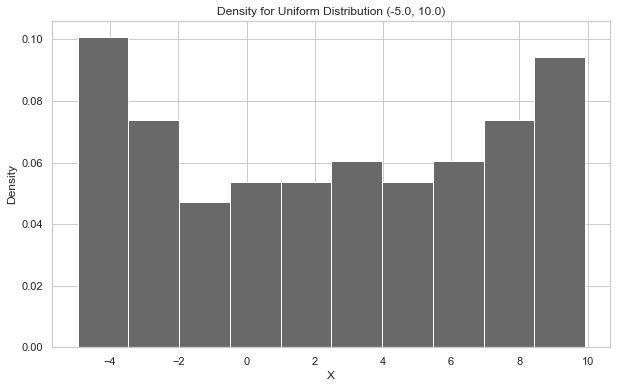

In [12]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( xs, density=True, color="DimGray") # a density
axes.set_ylabel( "Density")
axes.set_xlabel( "X")
axes.set_title( "Density for Uniform Distribution (-5.0, 10.0)")

plt.show()

I'm also going to explore the data a little bit. I used the parameters *low* and *high* to generate the data. What values did I get back?

In [13]:
print( "low =", min( xs))
print( "high=", max( xs))

low = -4.948704934136167
high= 9.924238206597877


Treating the synthetic data as an *empirical distribution*, I can also calculate the moments of the data. However, there aren't `m1` or `m2` functions. Instead, I'm going to use the identity between `m1` and the *arithmetic mean* and `m2` and the variance but I am not going to commit any particular Mathematical distribution as a model for this data even though I know that I used a Uniform distribution to generate it.

This last point can be a bit confusing. I would say all software packages and libraries will calculate the mean and variance but this is actually conflating two steps: calculating the first two moments and using those moments to parameterize a Mathematical distribution as a model (mean and variance). This is mostly because of the Central Limit Theorem which indicates that we are going to run into the Normal distribution a lot of the time but it is still combining *two steps*. As data scientists, we want to pull these two steps apart and make our own judgements.

In [14]:
print( "m1=", np.mean(xs))
print( "m2=", np.var( xs))

m1= 2.55922405435618
m2= 22.368135384226754


Now, what if `uniform` hadn't existed? I would have had to have used `random` which generates uniformly distributed random numbers on the range (0, 1) and projected it into the range (-5.0, 10.0):

In [15]:
np.random.seed([1482003424])
xs = np.random.random(100) * 15.0 - 5.0
print( xs[0:20])
print( "low =", min( xs))
print( "high=", max( xs))

[ 6.42438573 -3.22910746 -1.51821304 -3.87133369 -0.81487703  6.3629005
  8.50156041  4.86376343 -2.84230612  2.52226997  9.06166161  1.64070685
 -2.2239334   5.66352015  2.11413729 -3.75793272  3.8597046   5.83393762
 -3.78916267 -3.62696669]
low = -4.948704934136167
high= 9.924238206597877


Note that this is a *new* experiment so I set the random seed. However, I specifically wanted to see if the two different methods generated the same random numbers (they do) so I set it the same random seed. In general, each experiment will have a different random seed.

### Exercises.

**1\. A coin has a probability of heads, $\theta=0.67$. Simulate 25 events (coin tosses) from this Bernouilli distribution (25 Bernoulli *Trials*).**

1. Set the random seed.
2. Generate the samples, `x`. (There may be multiple ways to do this).
3. Calculate the first moment using `np.mean( x)` to get the estimate of $p$ (it's a Python trick). How close are you?

** Step 1. ** Set the seed

In [16]:
np.random.seed([125]) # made this up.

** Step 2\.** Calculate the data. We can use $\theta$ as a threshold value against a uniformly distributed variable on the range (0, 1) to simulate a Bernoulli trial. We indicate 1 for success and 0 for failure. This is a "roll your own" method using a *List Comprehension*.

In [17]:
xs = np.random.uniform(0, 1, 25)
result = []
for i in xs:
    if i < 0.67:
        result.append(1)
    else:
        result.append(0)
print (result)

[0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


**Step 3\.** We can use `np.mean` over the 0's and 1's to get $m_1$ which is then the Method of Moments estimator for $\theta$. We can compare this to the $\theta$ we started with:

In [18]:
print ("m1 = ", np.mean(result))

m1 =  0.72


The mean is 0.72 which is 0.05 higher than the 𝜃

### Working with the Normal Distribution.**

**2\. $\mu=32.5$ and $\sigma=0.325$**

1. Set the random seed.
2. Find the function for the normal distribution in the NumPy documentation.
3. Generate **25** samples for $x$ from a normal distribution with $\mu=32.5$ and $\sigma=0.325$ (1%). 
4. Plot a histogram of the data (change the labels!)
5. Calculate the first moment of $x$.
6. Using the Method of Moments, estimate the mean from the first moment. How far off is your estimate in percent?

**Step 1\.** Set the random seed:

In [19]:
np.random.seed([12873])

**Step 2\.** Looking in the documentation for NumPy, the function that creates random numbers from the normal distribution is:

`normal([loc, scale, size])`

where loc = mu, scale = standard deviation.

**Step 3\.** Let's make a function to translate mu and v into s (standard deviation) and then use the function to create 25 samples from a normal distribution with the specified parameters. We're going to print out 20 just to get a sense of the data:

In [20]:
xs = np.random.normal(32.5,0.325,25)
print( xs[0:20])

[32.59396246 32.55047946 32.74616382 32.10882515 31.89728886 32.4131988
 32.22917489 32.37756642 32.04337818 32.81159913 33.21456123 32.96110348
 32.62581775 32.97797022 32.71794508 32.53077859 32.58686424 32.28912607
 32.54937358 32.18383262]


**Step 4\.** Plot the data we just generated.

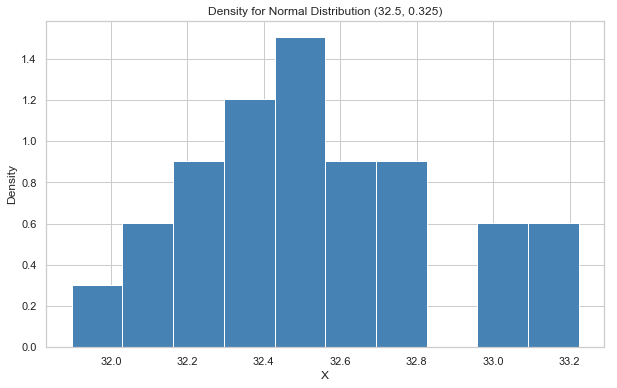

In [21]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1,1,1)

axes.hist(xs, density=True, color="SteelBlue")

axes.set_ylabel( "Density")
axes.set_xlabel( "X")
axes.set_title( "Density for Normal Distribution (32.5, 0.325)")
plt.show()


**Step 5\.** Print out the first moment using `np.mean(xs)`:

In [22]:
print ("m1 = %.2f"%(np.mean(xs)))

m1 = 32.53


**Step 6\.** Calculate the discrepancy. In this case, $m_1$ is the estimate of the mean:

In [23]:
print ("discrepany = %.2f"%(np.mean(xs)/32.5))

discrepany = 1.00


Now, one of the problems with this experiment is that we only run it once. We might run it and the mean will only be 1% off and we might run it again (with a different seed) and the results are 10% off.

**3\. Rerunning experiments **

1. Set the random seed.
2. Write a function that will generate *m* samples of $x$ from the Normal distribution, *n* times. This means the function will return a List of Lists. The outer List will have length *n* and the inner Lists will all have length *m*. Use the $\mu$ and $\sigma$ from the previous exercise. Set *m* = 25 and *n* = 100 (you'll then have 100 data sets, each with 25 data points).
3. Calculate the first moment of each of the *n* data sets.  You'll have 100 of these.
3. Plot a histogram of the data.
4. Calculate the low, high and first moment of the data and discuss.

**Step 1\.** Set the random seed:

In [24]:
np.random.seed([3841765259])

**Step 2\.** Write a function that will run the previous experiment multiple times. mu is the mean, v is the coefficient of variation, m is the number of samples, n is the number of trials. Test it with our parameters above.

In [25]:
def repeat_random_normal( mu, s, m, n,):
    data=[]
    for i in range(n):
        xs = np.random.normal(mu,s,m)
        mean = np.mean(xs)
        data.append(mean)
    return data

In [26]:
mu = 32.5
s = 0.325
m = 25
n = 100

xs = repeat_random_normal( mu, s, 25, 100)
print (xs)

[32.46242653760155, 32.468306952712325, 32.45933527280327, 32.524691752476194, 32.50446720155222, 32.413887919720985, 32.42826577542846, 32.619750635229586, 32.43780416218877, 32.511713730199695, 32.536331441578966, 32.40222490098488, 32.58388034625234, 32.51645631952673, 32.450057445873995, 32.51888821345854, 32.5243429216452, 32.460405368701466, 32.47518338578365, 32.62506354521875, 32.46096812735615, 32.60096614937028, 32.49815181192229, 32.46685963450535, 32.49480181521853, 32.42731636541621, 32.5342732619867, 32.409629163857865, 32.500485551272874, 32.52514831186165, 32.61708459218209, 32.54522428214382, 32.50677418763453, 32.47906045105377, 32.49719994508315, 32.69508466045785, 32.57541906456722, 32.56327027718226, 32.567751490188385, 32.54589509147439, 32.51415534881319, 32.51681016301343, 32.58155005501604, 32.545521690836345, 32.58473595346519, 32.68225447812419, 32.50833385175738, 32.53400427087761, 32.58195023640289, 32.419964893701696, 32.554389879217915, 32.48980054643315,

Notice that our $xs$ are themselves calculations of first moments! We can apply these techniques to our estimates and just analyze them as data.

**Step 3\.** Plot a histogram of the data:

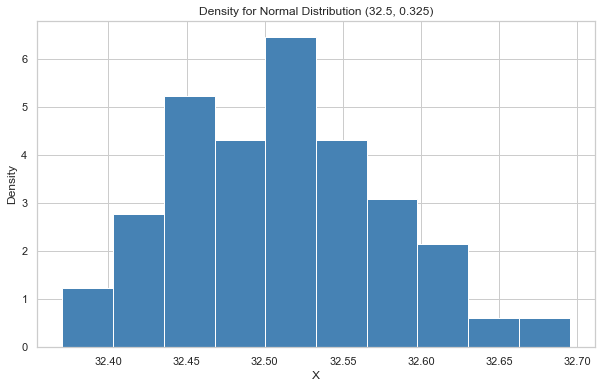

In [27]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1,1,1)

axes.hist(xs, density=True, color="SteelBlue")

axes.set_ylabel( "Density")
axes.set_xlabel( "X")
axes.set_title( "Density for Normal Distribution (32.5, 0.325)")
plt.show()


**Step 4\.** Calculate the low, high and mean of the data and discuss.

In [28]:
print("high = %.2f"%(np.max(xs)))
print("low = %.2f"%(np.min(xs)))
print("mean = %.2f"%(np.mean(xs)))

high = 32.70
low = 32.37
mean = 32.51


### Other Distributions

As we saw in the chapter "Mathematical Distributions", while the Normal distribution is parameterized by the mean and variance (standard deviation), other distributions are not. We would like to see what data from other distributions looks like whose first moment is about 32.5 (and whose second moment is about 0.325, if appropriate).

How can we do this? Well, we can cheat a little.

We can use the Method of Moments to move from our value of $\mu$ from Exercise 2 to the first moment $m_1$ and then the appropriate formulas to move to the parameters of whatever Mathematical distribution we want. Similarly, we can move from $\sigma^2$ to $m_2$ and then use that as the second moment if needed.

The Method of Moments formulas for various distributions are provided in the text. If you should need formulas for other distributions, you can either search for them or derive them yourself.

**4\. Exponentional Distribution**

Based on this discussion, use $\mu = 32.5$ and $\sigma = 0.325$ to generate 25 samples from the Exponential distribution and repeat the same steps we did for the Normal distribution. Remember, you need to convert these into $m_1$ and $m_2$ and then $m_1$ and $m_2$ (if needed) into the parameter(s) you need.

**Step 1\.** Set random seed:

In [29]:
np.random.seed([13579])

** Step 2\.** Find the function in the documentation:

`exponential(scale=1.0, size=None)`

We know from the text that the Exponential distribution is "officially" parameterized by $\lambda$, the rate. These kinds of mismatches often happen. Because $scale = \beta = \frac{1}{\lambda}$, we can use $\mu \rightarrow m_1 \rightarrow scale$ directly. $m_2$ is not used.

(Remember that if $\beta$, the scale, is 2 calls per hour then $\lambda$, the rate, is 30 minutes between calls.)

**Step 3\.** Generate samples.

In [30]:
xs = np.random.exponential(32.5,25)
print (xs)

[ 10.24130585   5.97298418  41.70464273  22.19850565  76.62517203
  12.3097266   26.94824384  18.34957454  63.80847869   3.00861947
 114.42340306  12.14161723  28.97489635 112.30845051   2.92806276
  15.80046132   0.56400985  66.64286128   3.72978538   6.82764527
   5.83039702  39.64279839   3.11343942  50.90471066  16.62022864]


** Step 4\.** Plot the data. Even though we used $\mu$, we're going to put $\lambda$ in the title:

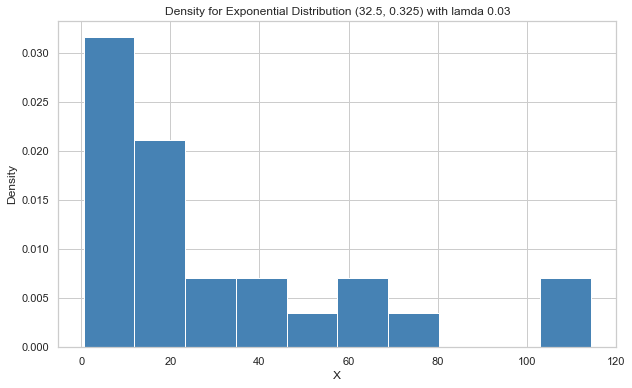

In [31]:
lamda = 1/32.5
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1,1,1)

axes.hist(xs, density=True, color="SteelBlue")

axes.set_ylabel( "Density")
axes.set_xlabel( "X")
axes.set_title( "Density for Exponential Distribution (32.5, 0.325) with lamda %.2f"%(lamda))
plt.show()

** Step 5\.** Print out the mean (the first moment) although we're really interested in the rate parameter, $\lambda$:

In [32]:
print("mean = %.2f"%(np.mean(xs)))

mean = 30.46


**Step 6\.** How far off is the mean you calculate from the $\mu$ you started off with (in percent)?

In [33]:
print ("discrepany = %.2f"%(np.mean(xs)/32.5))

discrepany = 0.94


**5\. Gamma Distribution**

Based on the discussion above, use $\mu = 32.5$ and $\sigma = 0.325$ to generate 25 samples from the Gamma distribution and repeat the same steps we did for the Normal distribution. Remember, you need to convert these into $m_1$ and $m_2$ and then $m_1$ and $m_2$ (if needed) into the parameter(s) you need.

**Step 1\.** Set random seed.

In [34]:
np.random.seed([683920])

** Step 2\.** Find the function in the documentation. 

The function from the documentation is here:

`gamma(shape, scale=1.0, size=None)¶`

I found the formula for the Method of Moments estimators [here](http://www.itl.nist.gov/div898/handbook/eda/section3/eda366b.htm). They are:

$$\gamma = (\frac{\mu}{\sigma})^2$$

$$\beta = \frac{\sigma^2}{\mu}$$

The description for the Gamma Distribution defines the parameters $\gamma$ as the shape parameter and $\beta$ as the scale parameter.

**Step 3\.** Generate samples and show the first 20

In [35]:
xs = np.random.gamma(32.5,0.325,25)
print (xs[0:20])

[ 8.30933462 10.71700517  9.7337992   9.17678707 13.39549782 10.13492657
 13.04066839  9.88880261 12.2686343  14.43160683 10.83809774  9.69735022
 10.6253944  14.75019697  9.16421106  9.55323054  9.46446888  8.61793338
 11.62465095  8.80913704]


** Step 4\.** Plot the data.

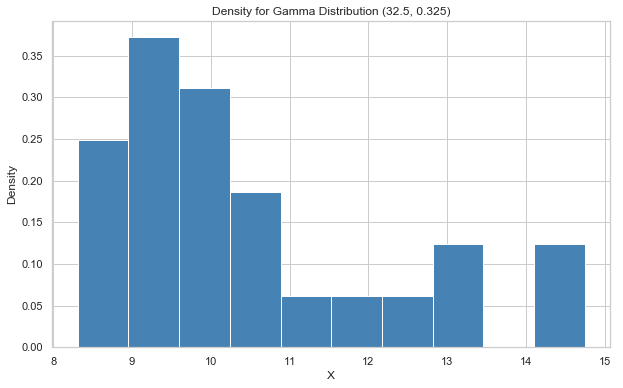

In [36]:
lamda = 1/32.5
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1,1,1)

axes.hist(xs, density=True, color="SteelBlue")

axes.set_ylabel( "Density")
axes.set_xlabel( "X")
axes.set_title( "Density for Gamma Distribution (32.5, 0.325)")
plt.show()

** Step 5\.** Print out the mean.

In [37]:
print("mean = %.2f"%(np.mean(xs)))

mean = 10.51


**Step 6\.** How far off is the mean you calculate from the $\mu$ you started off with (in percent)?

In [38]:
print ("discrepany = %.2f"%(np.mean(xs)/32.5))

discrepany = 0.32


**6\. From a Systems/Complexity Theory perspective, how might we interpret the variability of a factor like `x`? What might it mean if the variability is low or high? (Why doesn't x just have one value...why does it vary at all?)**

x is one of the factors impact the system either positively or negatively. Each observation of the x is different since they are observed within a system with other factors at a different time, thus it might change due to its own attributes or impacted by other factors in the system. A difference in variability might mean how sensitive it is to other factors or the deviation in its own range.

You are now equipped to generate simple and complex data from mathematical distributions and try to build models for that data and recover the distributions.